# Feed Forward

Pytorch kullanarak, input vektörü 

[0.1

0.3

0.7] 

olan tek neuronlu bir neural network oluştur.

Weight ve bias değeri random olacak. Bunun için SEED = 1 olacak

Aktivasyon fonksiyonu ise sigmoid. Formülü:

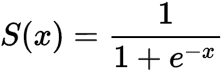

Önce kendi sigmoid fonksiyonunuzu yazın ve sonuç alın.

Sonra pytorch'un sigmoid fonksiyonunu kullanarak sonucu teyid edin.

Geçen haftaki kodları kullanacaksınız. Geçen hafta görmediğiniz ve bu çalışmada kullanacağınız tek yeni kod:

torch.sigmoid(x)

In [ ]:
import torch

x = torch.tensor([0.1, 0.3, 0.7]).reshape(-1, 1)

x

tensor([[0.1000],
        [0.3000],
        [0.7000]])

Olması gereken:
```
tensor([[0.1000],
        [0.3000],
        [0.7000]])

```

In [ ]:
torch.manual_seed(1) # Bunu da görmemiştiniz, o yüzden hazır veriyorum

weight = torch.randn(1, 3)

bias = torch.randn(1, 1)

weight, bias

(tensor([[0.6614, 0.2669, 0.0617]]), tensor([[0.6213]]))

Aktivasyon fonksiyonunu yaz:

In [ ]:
def sigmoid_activation(x):

  return 1 / (1 + torch.exp(-x))

fonksiyona giren

In [ ]:
tmp = torch.matmul(weight, x) + bias

tmp

tensor([[0.8107]])

aktivasyon sonucu

In [ ]:
sigmoid_activation(tmp)

tensor([[0.6923]])

hazır aktivasyon fonksiyonu ne verir?

In [ ]:
torch.sigmoid(tmp)

tensor([[0.6923]])

# Kendiniz yapın:

yukarıdaki tek adet neuron ile input arasına bir adet 2 neuronlu hidden layer ekleyip, ona da random weight ve bias değerleri atayıp, bu neuronlara da sigmoid aktivasyonu ekleyip, az önce oluşturduğunuz aynı output neuronundan sonuç değeri alın.

Seed = 1 için çıkacak değer tensor([[0.4632]])

# DERIVATIVE (Türev)!!!



In deep learning, we *train* models, updating them successively
so that they get better and better as they see more and more data.
Usually, getting better means minimizing a *loss function*,
a score that answers the question "how *bad* is our model?"
This question is more subtle than it appears.
Ultimately, what we really care about
is producing a model that performs well on data
that we have never seen before.
But we can only fit the model to data that we can actually see.
Thus we can decompose the task of fitting models into two key concerns:
(i) *optimization*: the process of fitting our models to observed data;
(ii) *generalization*: the mathematical principles and practitioners' wisdom
that guide as to how to produce models whose validity extends
beyond the exact set of data examples used to train them.

To help you understand
optimization problems and methods in later chapters,
here we give a very brief primer on differential calculus
that is commonly used in deep learning.

## Derivatives and Differentiation

We begin by addressing the calculation of derivatives,
a crucial step in nearly all deep learning optimization algorithms.
In deep learning, we typically choose loss functions
that are differentiable with respect to our model's parameters.
Put simply, this means that for each parameter,
we can determine how rapidly the loss would increase or decrease,
were we to *increase* or *decrease* that parameter
by an infinitesimally small amount.

Suppose that we have a function $f: \mathbb{R} \rightarrow \mathbb{R}$,
whose input and output are both scalars.
[**The *derivative* of $f$ is defined as**]


(**$$f'(x) = \lim_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h},$$**)
:eqlabel:`eq_derivative`

if this limit exists.
If $f'(a)$ exists,
$f$ is said to be *differentiable* at $a$.
If $f$ is differentiable at every number of an interval,
then this function is differentiable on this interval.
We can interpret the derivative $f'(x)$ in :eqref:`eq_derivative`
as the *instantaneous* rate of change of $f(x)$
with respect to $x$.
The so-called instantaneous rate of change is based on
the variation $h$ in $x$, which approaches $0$.

To illustrate derivatives,
let us experiment with an example.
(**Define $u = f(x) = 3x^2-4x$.**)


In [ ]:
import numpy as np

def f(x):
    return 3 * x ** 2 - 4 * x

[**By setting $x=1$ and letting $h$ approach $0$,
the numerical result of $\frac{f(x+h) - f(x)}{h}$**]
in :eqref:`eq_derivative`
(**approaches $2$.**)
Though this experiment is not a mathematical proof,
we will see later that the derivative $u'$ is $2$ when $x=1$.


In [ ]:
def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


Let us familiarize ourselves with a few equivalent notations for derivatives.
Given $y = f(x)$, where $x$ and $y$ are the independent variable and the dependent variable of the function $f$, respectively. The following expressions are equivalent:

$$f'(x) = y' = \frac{dy}{dx} = \frac{df}{dx} = \frac{d}{dx} f(x) = Df(x) = D_x f(x),$$

where symbols $\frac{d}{dx}$ and $D$ are *differentiation operators* that indicate operation of *differentiation*.
We can use the following rules to differentiate common functions:

* $DC = 0$ ($C$ is a constant),
* $Dx^n = nx^{n-1}$ (the *power rule*, $n$ is any real number),
* $De^x = e^x$,
* $D\ln(x) = 1/x.$

To differentiate a function that is formed from a few simpler functions such as the above common functions,
the following rules can be handy for us.
Suppose that functions $f$ and $g$ are both differentiable and $C$ is a constant,
we have the *constant multiple rule*

$$\frac{d}{dx} [Cf(x)] = C \frac{d}{dx} f(x),$$

the *sum rule*

$$\frac{d}{dx} [f(x) + g(x)] = \frac{d}{dx} f(x) + \frac{d}{dx} g(x),$$

the *product rule*

$$\frac{d}{dx} [f(x)g(x)] = f(x) \frac{d}{dx} [g(x)] + g(x) \frac{d}{dx} [f(x)],$$

and the *quotient rule*

$$\frac{d}{dx} \left[\frac{f(x)}{g(x)}\right] = \frac{g(x) \frac{d}{dx} [f(x)] - f(x) \frac{d}{dx} [g(x)]}{[g(x)]^2}.$$

Now we can apply a few of the above rules to find
$u' = f'(x) = 3 \frac{d}{dx} x^2-4\frac{d}{dx}x = 6x-4$.
Thus, by setting $x = 1$, we have $u' = 2$:
this is supported by our earlier experiment in this section
where the numerical result approaches $2$.
This derivative is also the slope of the tangent line
to the curve $u = f(x)$ when $x = 1$.

## Partial Derivatives

So far we have dealt with the differentiation of functions of just one variable.
In deep learning, functions often depend on *many* variables.
Thus, we need to extend the ideas of differentiation to these *multivariate* functions.


Let $y = f(x_1, x_2, \ldots, x_n)$ be a function with $n$ variables. The *partial derivative* of $y$ with respect to its $i^\mathrm{th}$  parameter $x_i$ is

$$ \frac{\partial y}{\partial x_i} = \lim_{h \rightarrow 0} \frac{f(x_1, \ldots, x_{i-1}, x_i+h, x_{i+1}, \ldots, x_n) - f(x_1, \ldots, x_i, \ldots, x_n)}{h}.$$


To calculate $\frac{\partial y}{\partial x_i}$, we can simply treat $x_1, \ldots, x_{i-1}, x_{i+1}, \ldots, x_n$ as constants and calculate the derivative of $y$ with respect to $x_i$.
For notation of partial derivatives, the following are equivalent:

$$\frac{\partial y}{\partial x_i} = \frac{\partial f}{\partial x_i} = f_{x_i} = f_i = D_i f = D_{x_i} f.$$


## Gradients
:label:`subsec_calculus-grad`

We can concatenate partial derivatives of a multivariate function with respect to all its variables to obtain the *gradient* vector of the function.
Suppose that the input of function $f: \mathbb{R}^n \rightarrow \mathbb{R}$ is an $n$-dimensional vector $\mathbf{x} = [x_1, x_2, \ldots, x_n]^\top$ and the output is a scalar. The gradient of the function $f(\mathbf{x})$ with respect to $\mathbf{x}$ is a vector of $n$ partial derivatives:

$$\nabla_{\mathbf{x}} f(\mathbf{x}) = \bigg[\frac{\partial f(\mathbf{x})}{\partial x_1}, \frac{\partial f(\mathbf{x})}{\partial x_2}, \ldots, \frac{\partial f(\mathbf{x})}{\partial x_n}\bigg]^\top,$$

where $\nabla_{\mathbf{x}} f(\mathbf{x})$ is often replaced by $\nabla f(\mathbf{x})$ when there is no ambiguity.

Let $\mathbf{x}$ be an $n$-dimensional vector, the following rules are often used when differentiating multivariate functions:

* For all $\mathbf{A} \in \mathbb{R}^{m \times n}$, $\nabla_{\mathbf{x}} \mathbf{A} \mathbf{x} = \mathbf{A}^\top$,
* For all  $\mathbf{A} \in \mathbb{R}^{n \times m}$, $\nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{A}  = \mathbf{A}$,
* For all  $\mathbf{A} \in \mathbb{R}^{n \times n}$, $\nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{A} \mathbf{x}  = (\mathbf{A} + \mathbf{A}^\top)\mathbf{x}$,
* $\nabla_{\mathbf{x}} \|\mathbf{x} \|^2 = \nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{x} = 2\mathbf{x}$.

Similarly, for any matrix $\mathbf{X}$, we have $\nabla_{\mathbf{X}} \|\mathbf{X} \|_F^2 = 2\mathbf{X}$. As we will see later, gradients are useful for designing optimization algorithms in deep learning.


## Chain Rule

However, such gradients can be hard to find.
This is because multivariate functions in deep learning are often *composite*,
so we may not apply any of the aforementioned rules to differentiate these functions.
Fortunately, the *chain rule* enables us to differentiate composite functions.

Let us first consider functions of a single variable.
Suppose that functions $y=f(u)$ and $u=g(x)$ are both differentiable, then the chain rule states that

$$\frac{dy}{dx} = \frac{dy}{du} \frac{du}{dx}.$$

Now let us turn our attention to a more general scenario
where functions have an arbitrary number of variables.
Suppose that the differentiable function $y$ has variables
$u_1, u_2, \ldots, u_m$, where each differentiable function $u_i$
has variables $x_1, x_2, \ldots, x_n$.
Note that $y$ is a function of $x_1, x_2, \ldots, x_n$.
Then the chain rule gives

$$\frac{dy}{dx_i} = \frac{dy}{du_1} \frac{du_1}{dx_i} + \frac{dy}{du_2} \frac{du_2}{dx_i} + \cdots + \frac{dy}{du_m} \frac{du_m}{dx_i}$$

for any $i = 1, 2, \ldots, n$.